In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer,OrdinalEncoder
from xverse.transformer import WOE
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, plot_confusion_matrix

from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
import warnings 
warnings.filterwarnings("ignore")
plt.rcParams['figure.figsize']=[15,8]

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import cross_val_score

In [3]:
xtrain = pd.read_csv("xtrain_ekdum_final.csv")
xtest = pd.read_csv("xtest_ekdum_final.csv")
ytrain = pd.read_csv("yeh_le_ytrain.csv")
ytest = pd.read_csv("yeh_le_ytest.csv")

In [4]:
xtrain.shape, xtest.shape

((52270, 37), (13068, 37))

In [5]:
pd.options.display.max_columns = None

In [6]:
xtrain.head()

,Gender,Contacted,Primary_Bank_Type,City_Category_B,City_Category_C,Employer_Category1_B,Employer_Category1_C,Source_Category_B,Source_Category_C,Source_Category_D,Source_Category_E,Source_Category_F,Source_Category_G,Age_Cat_Middle-Aged,Age_Cat_Old,Age_Cat_Young,Employer_Cat3_MSF,Employer_Cat3_MSME,Employer_Cat3_PVT,Employer_Cat3_VSF,Employer_Category2,Var1,Lead_Creation_Month,City_Code,Source,Monthly_Income,Existing_EMI,Loan_Amount,Loan_Period,Interest_Rate,loan_period_months,emi_recal,EMI-Monthly_Income_Ratio,Income_loan_Ratio,IR_15-20,IR_20-25,IR_25+
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,4,0,7,0.148588,0.059791,1680.0,0.0,19600,3.4,18.040,40.8,646,0.384524,0.879263,1,0,0
1,1,1,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,4,2,5,-0.267721,0.059791,1350.0,0.0,30000,5.0,20.000,60.0,795,0.588889,1.597424,1,0,0
2,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,1,10,7,0.148588,0.059791,5200.0,0.0,90000,4.4,15.108,52.8,2344,0.450769,1.266409,1,0,0
3,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,4,0,12,-0.267721,-0.279869,1500.0,0.0,22000,4.0,35.500,48.0,864,0.576000,1.085929,0,0,1
4,1,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,4,2,7,0.034822,0.059791,1500.0,600.0,11000,5.0,20.000,60.0,291,0.594000,0.527150,1,0,0


In [7]:
xtrain['Loan_Period'] = np.round(xtrain.Loan_Period)
xtest['Loan_Period'] = np.round(xtest.Loan_Period)

In [8]:
def quart(x):
    if x < 4:
        return 'Q2'
    elif x < 7:
        return 'Q3'
    elif x < 10:
        return 'Q4'
    else:
        return 'Q1'
    
xtrain['Quarter'] = xtrain.Lead_Creation_Month.map(quart)
xtest['Quarter'] = xtest.Lead_Creation_Month.map(quart)

In [9]:
xtrain.head()

,Gender,Contacted,Primary_Bank_Type,City_Category_B,City_Category_C,Employer_Category1_B,Employer_Category1_C,Source_Category_B,Source_Category_C,Source_Category_D,Source_Category_E,Source_Category_F,Source_Category_G,Age_Cat_Middle-Aged,Age_Cat_Old,Age_Cat_Young,Employer_Cat3_MSF,Employer_Cat3_MSME,Employer_Cat3_PVT,Employer_Cat3_VSF,Employer_Category2,Var1,Lead_Creation_Month,City_Code,Source,Monthly_Income,Existing_EMI,Loan_Amount,Loan_Period,Interest_Rate,loan_period_months,emi_recal,EMI-Monthly_Income_Ratio,Income_loan_Ratio,IR_15-20,IR_20-25,IR_25+,Quarter
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,4,0,7,0.148588,0.059791,1680.0,0.0,19600,3.0,18.040,40.8,646,0.384524,0.879263,1,0,0,Q4
1,1,1,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,4,2,5,-0.267721,0.059791,1350.0,0.0,30000,5.0,20.000,60.0,795,0.588889,1.597424,1,0,0,Q3
2,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,1,10,7,0.148588,0.059791,5200.0,0.0,90000,4.0,15.108,52.8,2344,0.450769,1.266409,1,0,0,Q4
3,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,4,0,12,-0.267721,-0.279869,1500.0,0.0,22000,4.0,35.500,48.0,864,0.576000,1.085929,0,0,1,Q1
4,1,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,4,2,7,0.034822,0.059791,1500.0,600.0,11000,5.0,20.000,60.0,291,0.594000,0.527150,1,0,0,Q4


In [10]:
xtrain = pd.get_dummies(xtrain, drop_first=True)
xtest = pd.get_dummies(xtest, drop_first=True)

In [11]:
xtrain = xtrain.drop('Lead_Creation_Month', axis=1)
xtest = xtest.drop('Lead_Creation_Month', axis=1)

In [12]:
xtrain = pd.concat([xtrain.iloc[:, 24:33], xtrain.iloc[:, 21:24], xtrain.iloc[:, :21], xtrain.iloc[:, 33:]], axis=1)
xtest = pd.concat([xtest.iloc[:, 24:33], xtest.iloc[:, 21:24], xtest.iloc[:, :21], xtest.iloc[:, 33:]], axis=1)

In [13]:
xtrain.head()

,Monthly_Income,Existing_EMI,Loan_Amount,Loan_Period,Interest_Rate,loan_period_months,emi_recal,EMI-Monthly_Income_Ratio,Income_loan_Ratio,Var1,City_Code,Source,Gender,Contacted,Primary_Bank_Type,City_Category_B,City_Category_C,Employer_Category1_B,Employer_Category1_C,Source_Category_B,Source_Category_C,Source_Category_D,Source_Category_E,Source_Category_F,Source_Category_G,Age_Cat_Middle-Aged,Age_Cat_Old,Age_Cat_Young,Employer_Cat3_MSF,Employer_Cat3_MSME,Employer_Cat3_PVT,Employer_Cat3_VSF,Employer_Category2,IR_15-20,IR_20-25,IR_25+,Quarter_Q2,Quarter_Q3,Quarter_Q4
0,1680.0,0.0,19600,3.0,18.040,40.8,646,0.384524,0.879263,0,0.148588,0.059791,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,4,1,0,0,0,0,1
1,1350.0,0.0,30000,5.0,20.000,60.0,795,0.588889,1.597424,2,-0.267721,0.059791,1,1,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,4,1,0,0,0,1,0
2,5200.0,0.0,90000,4.0,15.108,52.8,2344,0.450769,1.266409,10,0.148588,0.059791,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,1
3,1500.0,0.0,22000,4.0,35.500,48.0,864,0.576000,1.085929,0,-0.267721,-0.279869,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,4,0,0,1,0,0,0
4,1500.0,600.0,11000,5.0,20.000,60.0,291,0.594000,0.527150,2,0.034822,0.059791,1,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,4,1,0,0,0,0,1


In [14]:
from sklearn.model_selection import GridSearchCV

In [18]:
tuning_params={'penalty':['none','l2','l1','elasticnet'],'class_weight':['balanced'],'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

In [19]:
GRID_MOD=GridSearchCV(estimator=LogisticRegression(),param_grid=tuning_params,scoring='roc_auc',cv=5)

In [20]:
GRID_MOD.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'class_weight': ['balanced'],
                         'penalty': ['none', 'l2', 'l1', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='roc_auc')

In [21]:
GRID_MOD.best_params_

{'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'liblinear'}

In [22]:
lr = LogisticRegression(class_weight= 'balanced', penalty='l1', solver='liblinear')
lr.fit(xtrain, ytrain)
print(lr.score(xtrain, ytrain), lr.score(xtest, ytest))

ypred_train_lr = lr.predict(xtrain)
print(confusion_matrix(ytrain, ypred_train_lr))
print(classification_report(ytrain, ypred_train_lr))

ypred_test_lr = lr.predict(xtest)
print(confusion_matrix(ytest, ypred_test_lr))
print(classification_report(ytest, ypred_test_lr))

0.6889420317581787 0.6869452096724824
[[35360 16096]
 [  163   651]]
              precision    recall  f1-score   support

           0       1.00      0.69      0.81     51456
           1       0.04      0.80      0.07       814

    accuracy                           0.69     52270
   macro avg       0.52      0.74      0.44     52270
weighted avg       0.98      0.69      0.80     52270

[[8811 4056]
 [  35  166]]
              precision    recall  f1-score   support

           0       1.00      0.68      0.81     12867
           1       0.04      0.83      0.08       201

    accuracy                           0.69     13068
   macro avg       0.52      0.76      0.44     13068
weighted avg       0.98      0.69      0.80     13068



In [28]:
%matplotlib inline

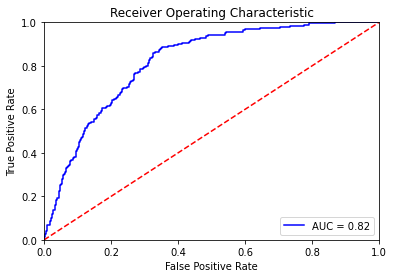

In [29]:
import sklearn.metrics as metrics
probs = lr.predict_proba(xtest)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(ytest, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [106]:
lr = LogisticRegression(class_weight='balanced')
lr.fit(xtrain, ytrain)
print(lr.score(xtrain, ytrain), lr.score(xtest, ytest))

ypred_train_lr = lr.predict(xtrain)
print(confusion_matrix(ytrain, ypred_train_lr))
print(classification_report(ytrain, ypred_train_lr))

ypred_test_lr = lr.predict(xtest)
print(confusion_matrix(ytest, ypred_test_lr))
print(classification_report(ytest, ypred_test_lr))

0.7833747847713793 0.790633608815427
[[40521 10935]
 [  388   426]]
              precision    recall  f1-score   support

           0       0.99      0.79      0.88     51456
           1       0.04      0.52      0.07       814

    accuracy                           0.78     52270
   macro avg       0.51      0.66      0.47     52270
weighted avg       0.98      0.78      0.86     52270

[[10205  2662]
 [   74   127]]
              precision    recall  f1-score   support

           0       0.99      0.79      0.88     12867
           1       0.05      0.63      0.08       201

    accuracy                           0.79     13068
   macro avg       0.52      0.71      0.48     13068
weighted avg       0.98      0.79      0.87     13068



In [13]:
dt = DecisionTreeClassifier()
dt.fit(xtrain, ytrain)
dt.score(xtrain, ytrain), dt.score(xtest, ytest)

(0.9997512913717237, 0.9673247627793082)

In [14]:
ypred_dt = dt.predict(xtest)
confusion_matrix(ytest, ypred_dt)

array([[12626,   241],
       [  186,    15]], dtype=int64)

In [15]:
print(classification_report(ytest, ypred_dt))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98     12867
           1       0.06      0.07      0.07       201

    accuracy                           0.97     13068
   macro avg       0.52      0.53      0.52     13068
weighted avg       0.97      0.97      0.97     13068



In [16]:
pd.DataFrame({"Feat":xtrain.columns, "Imp":dt.feature_importances_}).sort_values(by='Imp', ascending=False)

,Feat,Imp
7,EMI-Monthly_Income_Ratio,0.138790
6,emi_recal,0.109442
0,Monthly_Income,0.104685
8,Income_loan_Ratio,0.102300
4,Interest_Rate,0.084694
1,Existing_EMI,0.064196
2,Loan_Amount,0.043617
10,City_Code,0.026871
17,Employer_Category1_B,0.022236
9,Var1,0.022070


In [78]:
gnb = GaussianNB()
gnb.fit(xtrain, ytrain)
gnb.score(xtrain, ytrain), dt.score(xtest, ytest)

(0.3580830304189784, 0.9673247627793082)

In [18]:
ypred_gnb = dt.predict(xtest)
print(confusion_matrix(ytest, ypred_gnb))

print(classification_report(ytest, ypred_gnb))

[[12626   241]
 [  186    15]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.98     12867
           1       0.06      0.07      0.07       201

    accuracy                           0.97     13068
   macro avg       0.52      0.53      0.52     13068
weighted avg       0.97      0.97      0.97     13068



In [19]:
ypr_gnb = gnb.predict(xtrain)
print(confusion_matrix(ytrain, ypr_gnb))

print(classification_report(ytrain, ypr_gnb))

[[17933 33523]
 [   30   784]]
              precision    recall  f1-score   support

           0       1.00      0.35      0.52     51456
           1       0.02      0.96      0.04       814

    accuracy                           0.36     52270
   macro avg       0.51      0.66      0.28     52270
weighted avg       0.98      0.36      0.51     52270



In [35]:
list(np.arange(50,500,50))

[50, 100, 150, 200, 250, 300, 350, 400, 450]

In [36]:
tuning_params={'criterion':['gini','entropy'],'class_weight':['balanced'],'max_depth':list(np.arange(5,10,1)),
    'min_samples_split':list(np.arange(50,500,50)),
    'max_features':list(np.arange(5,40,2))}

GRID_MOD=GridSearchCV(estimator=DecisionTreeClassifier(),param_grid=tuning_params,scoring='roc_auc',cv=5)

GRID_MOD.fit(xtrain,ytrain)

GRID_MOD.best_params_

{'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': 5,
 'max_features': 25,
 'min_samples_split': 300}

In [38]:
dtree = DecisionTreeClassifier(class_weight= 'balanced',
 criterion='gini',
 max_depth= 5,
 max_features= 25,
 min_samples_split=300)
dtree.fit(xtrain, ytrain)
print(dtree.score(xtrain, ytrain), dtree.score(xtest, ytest))

ypred_train_dt = dtree.predict(xtrain)
print(confusion_matrix(ytrain, ypred_train_dt))
print(classification_report(ytrain, ypred_train_dt))

ypred_test_dt = dtree.predict(xtest)
print(confusion_matrix(ytest, ypred_test_dt))
print(classification_report(ytest, ypred_test_dt))

0.6795676296154582 0.6828129782675237
[[34847 16609]
 [  140   674]]
              precision    recall  f1-score   support

           0       1.00      0.68      0.81     51456
           1       0.04      0.83      0.07       814

    accuracy                           0.68     52270
   macro avg       0.52      0.75      0.44     52270
weighted avg       0.98      0.68      0.79     52270

[[8758 4109]
 [  36  165]]
              precision    recall  f1-score   support

           0       1.00      0.68      0.81     12867
           1       0.04      0.82      0.07       201

    accuracy                           0.68     13068
   macro avg       0.52      0.75      0.44     13068
weighted avg       0.98      0.68      0.80     13068



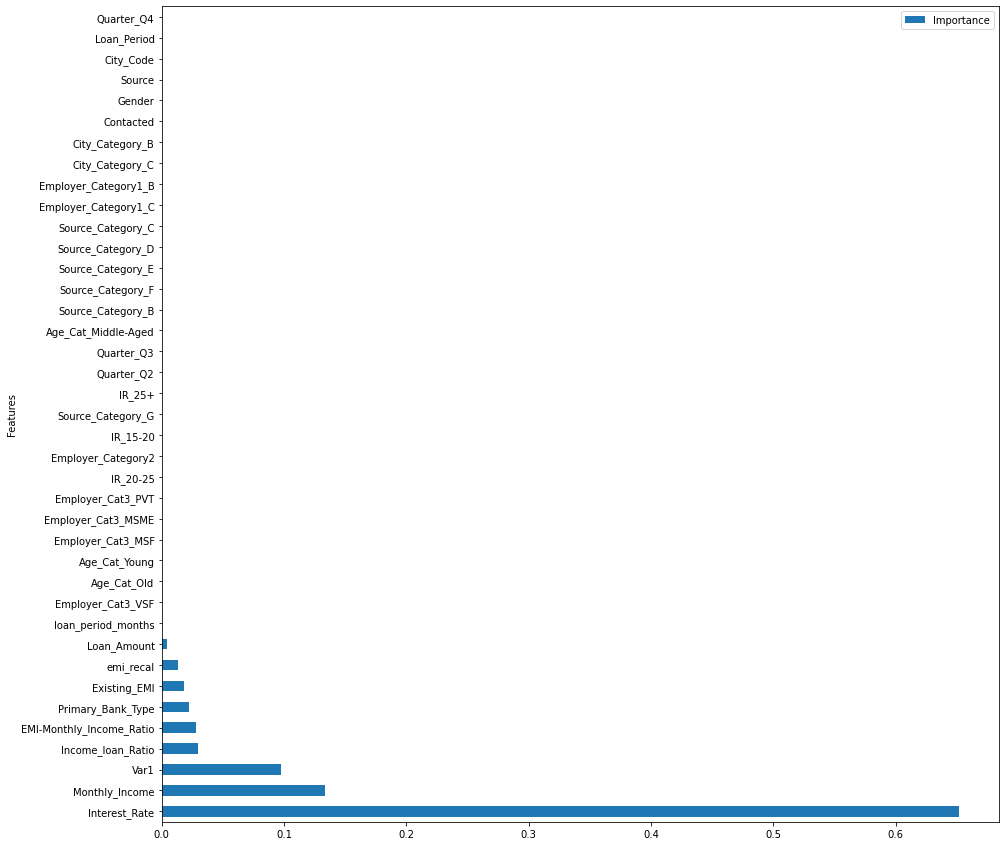

In [51]:
plt.rcParams['figure.figsize']=[15,15]
pd.DataFrame({'Features':xtrain.columns,'Importance':dtree.feature_importances_}).sort_values(by='Importance',ascending=False).set_index('Features').plot(kind='barh')
plt.show()

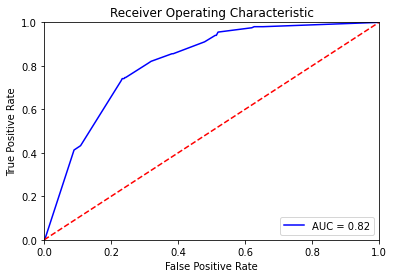

In [39]:
import sklearn.metrics as metrics
probs = dtree.predict_proba(xtest)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(ytest, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [21]:
pd.DataFrame({"Feat":xtrain.columns, "Imp":dtree.feature_importances_}).sort_values(by='Imp', ascending=False)

,Feat,Imp
0,Monthly_Income,3.690139e-01
4,Interest_Rate,9.145603e-02
7,EMI-Monthly_Income_Ratio,9.020749e-02
8,Income_loan_Ratio,7.486352e-02
6,emi_recal,6.904279e-02
1,Existing_EMI,3.940212e-02
2,Loan_Amount,3.248735e-02
9,Var1,1.966744e-02
10,City_Code,1.948986e-02
5,loan_period_months,1.547999e-02


In [ ]:
tuning_params={'criterion':['gini','entropy'],'class_weight':['balanced'],'max_depth':list(np.arange(5,10,1)),
    'min_samples_split':list(np.arange(50,500,50)),
    'max_features':list(np.arange(5,40,2))}

GRID_MOD=GridSearchCV(estimator=RandomForestClassifier(),param_grid=tuning_params,scoring='roc_auc',cv=5)

GRID_MOD.fit(xtrain,ytrain)

GRID_MOD.best_params_

In [113]:
rf = RandomForestClassifier()
rf.fit(xtrain, ytrain)
print(rf.score(xtrain, ytrain), rf.score(xtest, ytest))

ypred_train_rf = rf.predict(xtrain)
print(confusion_matrix(ytrain, ypred_train_rf))
print(classification_report(ytrain, ypred_train_rf))

ypred_test_rf = rf.predict(xtest)
print(confusion_matrix(ytest, ypred_test_rf))
print(classification_report(ytest, ypred_test_rf))

0.9996747656399464 0.9843893480257117
[[51443    13]
 [    4   810]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     51456
           1       0.98      1.00      0.99       814

    accuracy                           1.00     52270
   macro avg       0.99      1.00      0.99     52270
weighted avg       1.00      1.00      1.00     52270

[[12864     3]
 [  201     0]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     12867
           1       0.00      0.00      0.00       201

    accuracy                           0.98     13068
   macro avg       0.49      0.50      0.50     13068
weighted avg       0.97      0.98      0.98     13068



### SMOTE

In [79]:
sm = SMOTE(0.43,sampling_strategy = 'float', random_state=10)
xtrain_samp, ytrain_samp = sm.fit_resample(xtrain, ytrain)
xtrain_samp.head()

,Monthly_Income,Existing_EMI,Loan_Amount,Loan_Period,Interest_Rate,loan_period_months,emi_recal,EMI-Monthly_Income_Ratio,Income_loan_Ratio,Var1,City_Code,Source,Gender,Contacted,Primary_Bank_Type,City_Category_B,City_Category_C,Employer_Category1_B,Employer_Category1_C,Source_Category_B,Source_Category_C,Source_Category_D,Source_Category_E,Source_Category_F,Source_Category_G,Age_Cat_Middle-Aged,Age_Cat_Old,Age_Cat_Young,Employer_Cat3_MSF,Employer_Cat3_MSME,Employer_Cat3_PVT,Employer_Cat3_VSF,Employer_Category2,IR_15-20,IR_20-25,IR_25+,Quarter_Q2,Quarter_Q3,Quarter_Q4
0,1680.0,0.0,19600,3.0,18.040,40.8,646,0.384524,0.879263,0,0.148588,0.059791,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,4,1,0,0,0,0,1
1,1350.0,0.0,30000,5.0,20.000,60.0,795,0.588889,1.597424,2,-0.267721,0.059791,1,1,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,4,1,0,0,0,1,0
2,5200.0,0.0,90000,4.0,15.108,52.8,2344,0.450769,1.266409,10,0.148588,0.059791,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,1
3,1500.0,0.0,22000,4.0,35.500,48.0,864,0.576000,1.085929,0,-0.267721,-0.279869,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,4,0,0,1,0,0,0
4,1500.0,600.0,11000,5.0,20.000,60.0,291,0.594000,0.527150,2,0.034822,0.059791,1,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,4,1,0,0,0,0,1


In [80]:
xtrain_samp.shape

(73582, 39)

In [81]:
ytrain_samp.value_counts()

Approved
0           51456
1           22126
dtype: int64

In [82]:
xtrain.Var1.unique()

array([ 0,  2, 10,  4,  7], dtype=int64)

In [83]:
xtrain_samp.Var1.unique()

array([ 0,  2, 10,  4,  7,  6,  1,  8,  5,  9,  3], dtype=int64)

In [84]:
xtrain_samp.columns

Index(['Monthly_Income', 'Existing_EMI', 'Loan_Amount', 'Loan_Period',
       'Interest_Rate', 'loan_period_months', 'emi_recal',
       'EMI-Monthly_Income_Ratio', 'Income_loan_Ratio', 'Var1', 'City_Code',
       'Source', 'Gender', 'Contacted', 'Primary_Bank_Type', 'City_Category_B',
       'City_Category_C', 'Employer_Category1_B', 'Employer_Category1_C',
       'Source_Category_B', 'Source_Category_C', 'Source_Category_D',
       'Source_Category_E', 'Source_Category_F', 'Source_Category_G',
       'Age_Cat_Middle-Aged', 'Age_Cat_Old', 'Age_Cat_Young',
       'Employer_Cat3_MSF', 'Employer_Cat3_MSME', 'Employer_Cat3_PVT',
       'Employer_Cat3_VSF', 'Employer_Category2', 'IR_15-20', 'IR_20-25',
       'IR_25+', 'Quarter_Q2', 'Quarter_Q3', 'Quarter_Q4'],
      dtype='object')

In [85]:
%matplotlib inline

In [86]:
plt.rcParams['figure.figsize'] = [15, 8]

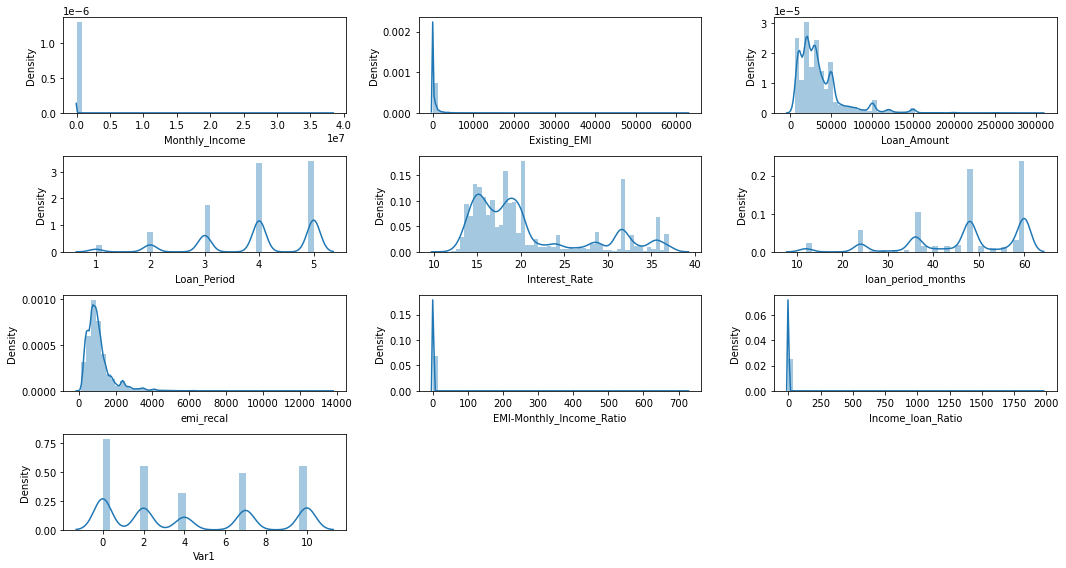

In [87]:
# i = 1
# for x in xtrain.iloc[:, :10]:
#     plt.subplot(4, 3, i)
#     sns.distplot(xtrain[x])
#     plt.tight_layout()
#     i += 1

In [88]:
# i = 1
# for x in xtrain_samp.iloc[:, :10]:
#     plt.subplot(4, 3, i)
#     sns.distplot(xtrain_samp[x])
#     plt.tight_layout()
#     i += 1

In [107]:
lr = LogisticRegression(class_weight='balanced')
lr.fit(xtrain_samp, ytrain_samp)
print(lr.score(xtrain_samp, ytrain_samp), lr.score(xtest, ytest))

ypred_train_lr = lr.predict(xtrain_samp)
print(confusion_matrix(ytrain_samp, ypred_train_lr))
print(classification_report(ytrain_samp, ypred_train_lr))

ypred_test_lr = lr.predict(xtest)
print(confusion_matrix(ytest, ypred_test_lr))
print(classification_report(ytest, ypred_test_lr))

0.7041803701992335 0.78818487909397
[[40422 11034]
 [10733 11393]]
              precision    recall  f1-score   support

           0       0.79      0.79      0.79     51456
           1       0.51      0.51      0.51     22126

    accuracy                           0.70     73582
   macro avg       0.65      0.65      0.65     73582
weighted avg       0.71      0.70      0.70     73582

[[10173  2694]
 [   74   127]]
              precision    recall  f1-score   support

           0       0.99      0.79      0.88     12867
           1       0.05      0.63      0.08       201

    accuracy                           0.79     13068
   macro avg       0.52      0.71      0.48     13068
weighted avg       0.98      0.79      0.87     13068



In [89]:
dtree = DecisionTreeClassifier(random_state=42, class_weight='balanced')
dtree.fit(xtrain_samp, ytrain_samp)
print(dtree.score(xtrain_samp, ytrain_samp), dtree.score(xtest, ytest))

ypred_train_dt = dt.predict(xtrain_samp)
print(confusion_matrix(ytrain_samp, ypred_train_dt))
print(classification_report(ytrain_samp, ypred_train_dt))

ypred_test_dt = dt.predict(xtest)
print(confusion_matrix(ytest, ypred_test_dt))
print(classification_report(ytest, ypred_test_dt))

0.9998233263569895 0.9634220997857361
[[51456     0]
 [17087  5039]]
              precision    recall  f1-score   support

           0       0.75      1.00      0.86     51456
           1       1.00      0.23      0.37     22126

    accuracy                           0.77     73582
   macro avg       0.88      0.61      0.61     73582
weighted avg       0.83      0.77      0.71     73582

[[12626   241]
 [  186    15]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.98     12867
           1       0.06      0.07      0.07       201

    accuracy                           0.97     13068
   macro avg       0.52      0.53      0.52     13068
weighted avg       0.97      0.97      0.97     13068



In [90]:
pd.DataFrame({"Feat":xtrain_samp.columns, "Imp":dtree.feature_importances_}).sort_values(by='Imp', ascending=False)

,Feat,Imp
0,Monthly_Income,3.043557e-01
11,Source,1.040887e-01
10,City_Code,8.694317e-02
24,Source_Category_G,5.114879e-02
19,Source_Category_B,4.099606e-02
20,Source_Category_C,3.211959e-02
31,Employer_Cat3_VSF,2.493364e-02
4,Interest_Rate,2.486793e-02
8,Income_loan_Ratio,2.315772e-02
3,Loan_Period,2.296319e-02


In [114]:
rf = RandomForestClassifier(random_state=42, class_weight='balanced')
rf.fit(xtrain_samp, ytrain_samp)
print(rf.score(xtrain_samp, ytrain_samp), rf.score(xtest, ytest))

ypred_train_rf = rf.predict(xtrain_samp)
print(confusion_matrix(ytrain_samp, ypred_train_rf))
print(classification_report(ytrain_samp, ypred_train_rf))

ypred_test_rf = rf.predict(xtest)
print(confusion_matrix(ytest, ypred_test_rf))
print(classification_report(ytest, ypred_test_rf))

0.9998233263569895 0.9837006427915519
[[51448     8]
 [    5 22121]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     51456
           1       1.00      1.00      1.00     22126

    accuracy                           1.00     73582
   macro avg       1.00      1.00      1.00     73582
weighted avg       1.00      1.00      1.00     73582

[[12855    12]
 [  201     0]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     12867
           1       0.00      0.00      0.00       201

    accuracy                           0.98     13068
   macro avg       0.49      0.50      0.50     13068
weighted avg       0.97      0.98      0.98     13068



In [108]:
gnb = GaussianNB()
gnb.fit(xtrain_samp, ytrain_samp)
print(gnb.score(xtrain_samp, ytrain_samp), dt.score(xtest, ytest))

ypred_train_gnb = gnb.predict(xtrain_samp)
print(confusion_matrix(ytrain_samp, ypred_train_gnb))
print(classification_report(ytrain_samp, ypred_train_gnb))

ypred_test_gnb = dt.predict(xtest)
print(confusion_matrix(ytest, ypred_test_gnb))
print(classification_report(ytest, ypred_test_gnb))

0.35341523742219566 0.9673247627793082
[[ 4040 47416]
 [  161 21965]]
              precision    recall  f1-score   support

           0       0.96      0.08      0.15     51456
           1       0.32      0.99      0.48     22126

    accuracy                           0.35     73582
   macro avg       0.64      0.54      0.31     73582
weighted avg       0.77      0.35      0.25     73582

[[12626   241]
 [  186    15]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.98     12867
           1       0.06      0.07      0.07       201

    accuracy                           0.97     13068
   macro avg       0.52      0.53      0.52     13068
weighted avg       0.97      0.97      0.97     13068



### Transformation and Scaling

In [91]:
xtrain_samp_num = xtrain_samp.iloc[:, :9]
xtrain_samp_cat = xtrain_samp.iloc[:, 9:]

pw = PowerTransformer()
xtrain_samp_num_trans = pd.DataFrame(pw.fit_transform(xtrain_samp_num), columns=xtrain_samp_num.columns)
xtrain_samp_num_trans.head()

,Monthly_Income,Existing_EMI,Loan_Amount,Loan_Period,Interest_Rate,loan_period_months,emi_recal,EMI-Monthly_Income_Ratio,Income_loan_Ratio
0,-0.828859,-0.824139,-0.610584,-1.029658,0.186692,-0.694193,-0.681398,-0.297776,0.227760
1,-1.116531,-0.824139,-0.027115,1.177051,0.604499,1.202412,-0.328906,0.685408,1.289112
2,0.647514,-0.824139,1.480604,-0.097938,-0.790772,0.393129,1.442349,0.055313,0.871270
3,-0.977860,-0.824139,-0.452288,-0.097938,1.779063,-0.080474,-0.188693,0.631878,0.596612
4,-0.977860,1.187695,-1.401711,1.177051,0.604499,1.202412,-2.074114,0.706364,-0.591202


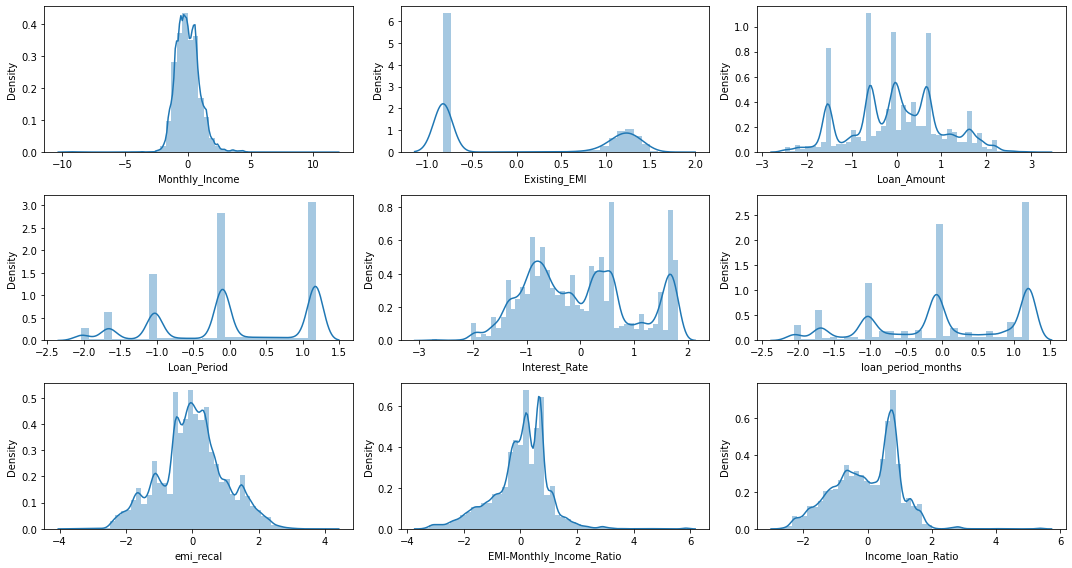

In [180]:
i = 1
for x in xtrain_samp_num_trans:
    plt.subplot(3, 3, i)
    sns.distplot(xtrain_samp_num_trans[x])
    plt.tight_layout()
    i += 1

In [93]:
xtrain_samp_trans = pd.concat([xtrain_samp_num_trans, xtrain_samp_cat], axis=1)
xtrain_samp_trans.shape

(73582, 39)

In [94]:
xtest_num = xtest.iloc[:, :9]
xtest_cat = xtest.iloc[:, 9:]

xtest_num_trans = pd.DataFrame(pw.transform(xtest_num), columns=xtest_num.columns)

xtest_trans = pd.concat([xtest_num_trans, xtest_cat], axis=1)
xtest_trans.shape

(13068, 39)

In [95]:
dtree = DecisionTreeClassifier(random_state=42, class_weight='balanced')
dtree.fit(xtrain_samp_trans, ytrain_samp)
print(dtree.score(xtrain_samp_trans, ytrain_samp), dtree.score(xtest_trans, ytest))

ypred_train_dt = dt.predict(xtrain_samp_trans)
print(confusion_matrix(ytrain_samp, ypred_train_dt))
print(classification_report(ytrain_samp, ypred_train_dt))

ypred_test_dt = dt.predict(xtest_trans)
print(confusion_matrix(ytest, ypred_test_dt))
print(classification_report(ytest, ypred_test_dt))

0.9998233263569895 0.9632690541781451
[[51456     0]
 [22126     0]]
              precision    recall  f1-score   support

           0       0.70      1.00      0.82     51456
           1       0.00      0.00      0.00     22126

    accuracy                           0.70     73582
   macro avg       0.35      0.50      0.41     73582
weighted avg       0.49      0.70      0.58     73582

[[12867     0]
 [  201     0]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     12867
           1       0.00      0.00      0.00       201

    accuracy                           0.98     13068
   macro avg       0.49      0.50      0.50     13068
weighted avg       0.97      0.98      0.98     13068



In [96]:
gnb = GaussianNB()
gnb.fit(xtrain_samp_trans, ytrain_samp)
print(gnb.score(xtrain_samp_trans, ytrain_samp), dt.score(xtest_trans, ytest))

ypred_train_gnb = gnb.predict(xtrain_samp_trans)
print(confusion_matrix(ytrain_samp, ypred_train_gnb))
print(classification_report(ytrain_samp, ypred_train_gnb))

ypred_test_gnb = dt.predict(xtest_trans)
print(confusion_matrix(ytest, ypred_test_gnb))
print(classification_report(ytest, ypred_test_gnb))

0.7492321491669158 0.9846189164370982
[[34265 17191]
 [ 1261 20865]]
              precision    recall  f1-score   support

           0       0.96      0.67      0.79     51456
           1       0.55      0.94      0.69     22126

    accuracy                           0.75     73582
   macro avg       0.76      0.80      0.74     73582
weighted avg       0.84      0.75      0.76     73582

[[12867     0]
 [  201     0]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     12867
           1       0.00      0.00      0.00       201

    accuracy                           0.98     13068
   macro avg       0.49      0.50      0.50     13068
weighted avg       0.97      0.98      0.98     13068



In [97]:
sc = StandardScaler()
xtrain_samp_num_scaled = pd.DataFrame(pw.fit_transform(xtrain_samp_num_trans), columns=xtrain_samp_num_trans.columns)
xtrain_samp_scaled = pd.concat([xtrain_samp_num_scaled, xtrain_samp_cat], axis=1)
xtrain_samp_scaled.shape

(73582, 39)

In [98]:
xtest_num_scaled = pd.DataFrame(pw.transform(xtest_num_trans), columns=xtest_num_trans.columns)

xtest_scaled = pd.concat([xtest_num_scaled, xtest_cat], axis=1)
xtest_scaled.shape

(13068, 39)

In [105]:
lr = LogisticRegression(class_weight='balanced')
lr.fit(xtrain_samp_scaled, ytrain_samp)
print(lr.score(xtrain_samp_scaled, ytrain_samp), lr.score(xtest_scaled, ytest))

ypred_train_lr = lr.predict(xtrain_samp_scaled)
print(confusion_matrix(ytrain_samp, ypred_train_lr))
print(classification_report(ytrain_samp, ypred_train_lr))

ypred_test_lr = lr.predict(xtest_scaled)
print(confusion_matrix(ytest, ypred_test_lr))
print(classification_report(ytest, ypred_test_lr))

0.9414123019216656 0.9370982552800735
[[48836  2620]
 [ 1691 20435]]
              precision    recall  f1-score   support

           0       0.97      0.95      0.96     51456
           1       0.89      0.92      0.90     22126

    accuracy                           0.94     73582
   macro avg       0.93      0.94      0.93     73582
weighted avg       0.94      0.94      0.94     73582

[[12214   653]
 [  169    32]]
              precision    recall  f1-score   support

           0       0.99      0.95      0.97     12867
           1       0.05      0.16      0.07       201

    accuracy                           0.94     13068
   macro avg       0.52      0.55      0.52     13068
weighted avg       0.97      0.94      0.95     13068



In [99]:
dtree = DecisionTreeClassifier(random_state=42, class_weight='balanced')
dtree.fit(xtrain_samp_scaled, ytrain_samp)
print(dtree.score(xtrain_samp_scaled, ytrain_samp), dtree.score(xtest_scaled, ytest))

ypred_train_dt = dt.predict(xtrain_samp_scaled)
print(confusion_matrix(ytrain_samp, ypred_train_dt))
print(classification_report(ytrain_samp, ypred_train_dt))

ypred_test_dt = dt.predict(xtest_scaled)
print(confusion_matrix(ytest, ypred_test_dt))
print(classification_report(ytest, ypred_test_dt))

0.9998233263569895 0.9631925313743496
[[51456     0]
 [22126     0]]
              precision    recall  f1-score   support

           0       0.70      1.00      0.82     51456
           1       0.00      0.00      0.00     22126

    accuracy                           0.70     73582
   macro avg       0.35      0.50      0.41     73582
weighted avg       0.49      0.70      0.58     73582

[[12867     0]
 [  201     0]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     12867
           1       0.00      0.00      0.00       201

    accuracy                           0.98     13068
   macro avg       0.49      0.50      0.50     13068
weighted avg       0.97      0.98      0.98     13068



In [100]:
gnb = GaussianNB()
gnb.fit(xtrain_samp_scaled, ytrain_samp)
print(gnb.score(xtrain_samp_scaled, ytrain_samp), dt.score(xtest_scaled, ytest))

ypred_gnb = gnb.predict(xtrain_samp_scaled)
print(confusion_matrix(ytrain_samp, ypred_train_gnb))
print(classification_report(ytrain_samp, ypred_train_gnb))

ypred_test_gnb = dt.predict(xtest_scaled)
print(confusion_matrix(ytest, ypred_test_gnb))
print(classification_report(ytest, ypred_test_gnb))

0.7500203854203473 0.9846189164370982
[[34265 17191]
 [ 1261 20865]]
              precision    recall  f1-score   support

           0       0.96      0.67      0.79     51456
           1       0.55      0.94      0.69     22126

    accuracy                           0.75     73582
   macro avg       0.76      0.80      0.74     73582
weighted avg       0.84      0.75      0.76     73582

[[12867     0]
 [  201     0]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     12867
           1       0.00      0.00      0.00       201

    accuracy                           0.98     13068
   macro avg       0.49      0.50      0.50     13068
weighted avg       0.97      0.98      0.98     13068



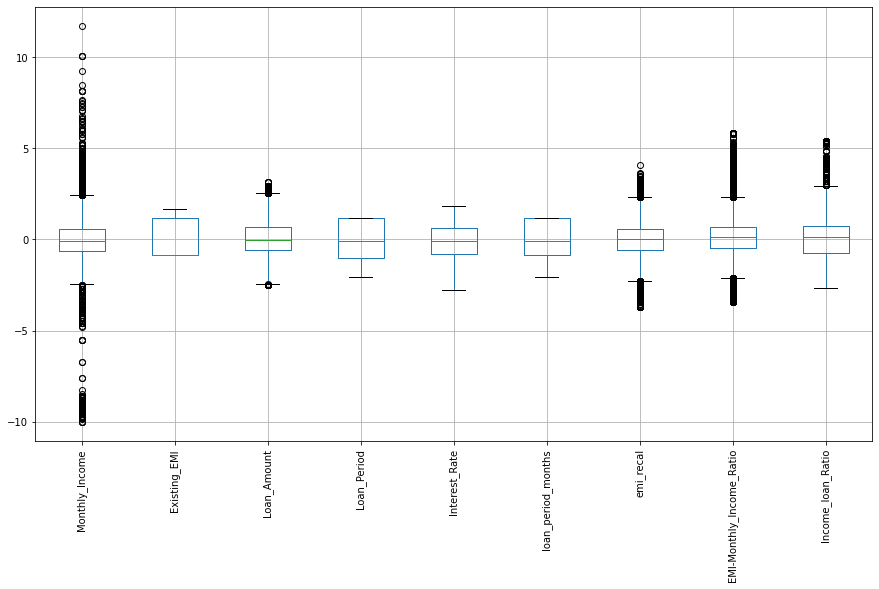

In [101]:
xtrain_samp_num_trans.boxplot()
plt.xticks(rotation=90)
plt.show()

In [131]:
low = xtrain_samp_num_trans.quantile(0.02)
up = xtrain_samp_num_trans.quantile(0.98)

xtrain_samp_num_clip = xtrain_samp_num_trans.clip(lower=low, upper=up, axis=1)
xtrain_samp_clip = pd.concat([xtrain_samp_num_clip, xtrain_samp_cat], axis=1)
xtrain_samp_clip.shape

(73582, 39)

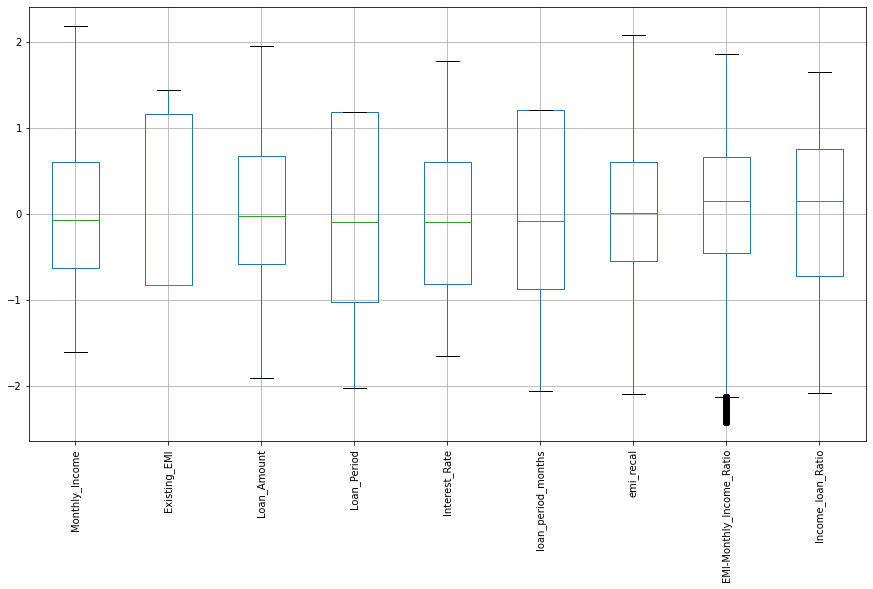

In [132]:
xtrain_samp_num_clip.boxplot()
plt.xticks(rotation=90)
plt.show()

In [133]:
lr = LogisticRegression(class_weight='balanced')
lr.fit(xtrain_samp_clip, ytrain_samp)
print(lr.score(xtrain_samp_clip, ytrain_samp), lr.score(xtest_trans, ytest))

ypred_train_lr = lr.predict(xtrain_samp_clip)
print(confusion_matrix(ytrain_samp, ypred_train_lr))
print(classification_report(ytrain_samp, ypred_train_lr))

ypred_test_lr = lr.predict(xtest_trans)
print(confusion_matrix(ytest, ypred_test_lr))
print(classification_report(ytest, ypred_test_lr))

0.9403386697833709 0.9377869605142333
[[48774  2682]
 [ 1708 20418]]
              precision    recall  f1-score   support

           0       0.97      0.95      0.96     51456
           1       0.88      0.92      0.90     22126

    accuracy                           0.94     73582
   macro avg       0.93      0.94      0.93     73582
weighted avg       0.94      0.94      0.94     73582

[[12223   644]
 [  169    32]]
              precision    recall  f1-score   support

           0       0.99      0.95      0.97     12867
           1       0.05      0.16      0.07       201

    accuracy                           0.94     13068
   macro avg       0.52      0.55      0.52     13068
weighted avg       0.97      0.94      0.95     13068



In [134]:
dtree = DecisionTreeClassifier(random_state=42, class_weight='balanced')
dtree.fit(xtrain_samp_clip, ytrain_samp)
print(dtree.score(xtrain_samp_clip, ytrain_samp), dtree.score(xtest_trans, ytest))

ypred_train_dt = dt.predict(xtrain_samp_clip)
print(confusion_matrix(ytrain_samp, ypred_train_dt))
print(classification_report(ytrain_samp, ypred_train_dt))

ypred_test_dt = dt.predict(xtest_trans)
print(confusion_matrix(ytest, ypred_test_dt))
print(classification_report(ytest, ypred_test_dt))

0.9998233263569895 0.9613559840832568
[[51456     0]
 [22126     0]]
              precision    recall  f1-score   support

           0       0.70      1.00      0.82     51456
           1       0.00      0.00      0.00     22126

    accuracy                           0.70     73582
   macro avg       0.35      0.50      0.41     73582
weighted avg       0.49      0.70      0.58     73582

[[12867     0]
 [  201     0]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     12867
           1       0.00      0.00      0.00       201

    accuracy                           0.98     13068
   macro avg       0.49      0.50      0.50     13068
weighted avg       0.97      0.98      0.98     13068



In [138]:
rf = RandomForestClassifier(random_state=42, class_weight='balanced')
rf.fit(xtrain_samp_clip, ytrain_samp)
print(rf.score(xtrain_samp_clip, ytrain_samp), rf.score(xtest_trans, ytest))

ypred_train_rf = rf.predict(xtrain_samp_clip)
print(confusion_matrix(ytrain_samp, ypred_train_rf))
print(classification_report(ytrain_samp, ypred_train_rf))

ypred_test_rf = rf.predict(xtest_trans)
print(confusion_matrix(ytest, ypred_test_rf))
print(classification_report(ytest, ypred_test_rf))

0.9998233263569895 0.9836241199877563
[[51447     9]
 [    4 22122]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     51456
           1       1.00      1.00      1.00     22126

    accuracy                           1.00     73582
   macro avg       1.00      1.00      1.00     73582
weighted avg       1.00      1.00      1.00     73582

[[12854    13]
 [  201     0]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     12867
           1       0.00      0.00      0.00       201

    accuracy                           0.98     13068
   macro avg       0.49      0.50      0.50     13068
weighted avg       0.97      0.98      0.98     13068



In [139]:
from sklearn.svm import SVC

In [160]:
svc = SVC(class_weight='balanced', random_state=42)
svc.fit(xtrain, ytrain)
print(svc.score(xtrain, ytrain), svc.score(xtest, ytest))

ypred_train_svc = svc.predict(xtrain)
print(confusion_matrix(ytrain, ypred_train_svc))
print(classification_report(ytrain, ypred_train_svc))

ypred_test_svc = svc.predict(xtest)
print(confusion_matrix(ytest, ypred_test_svc))
print(classification_report(ytest, ypred_test_svc))

0.7496078056246412 0.7562748699112335
[[38694 12762]
 [  326   488]]
              precision    recall  f1-score   support

           0       0.99      0.75      0.86     51456
           1       0.04      0.60      0.07       814

    accuracy                           0.75     52270
   macro avg       0.51      0.68      0.46     52270
weighted avg       0.98      0.75      0.84     52270

[[9738 3129]
 [  56  145]]
              precision    recall  f1-score   support

           0       0.99      0.76      0.86     12867
           1       0.04      0.72      0.08       201

    accuracy                           0.76     13068
   macro avg       0.52      0.74      0.47     13068
weighted avg       0.98      0.76      0.85     13068



In [145]:
svc = SVC(class_weight='balanced', random_state=42)
svc.fit(xtrain_samp, ytrain_samp)
print(svc.score(xtrain_samp, ytrain_samp), svc.score(xtest, ytest))

ypred_train_svc = svc.predict(xtrain_samp)
print(confusion_matrix(ytrain_samp, ypred_train_svc))
print(classification_report(ytrain_samp, ypred_train_svc))

ypred_test_svc = svc.predict(xtest)
print(confusion_matrix(ytest, ypred_test_svc))
print(classification_report(ytest, ypred_test_svc))

0.7060558288711913 0.7438781756963575
[[37887 13569]
 [ 8060 14066]]
              precision    recall  f1-score   support

           0       0.82      0.74      0.78     51456
           1       0.51      0.64      0.57     22126

    accuracy                           0.71     73582
   macro avg       0.67      0.69      0.67     73582
weighted avg       0.73      0.71      0.71     73582

[[9568 3299]
 [  48  153]]
              precision    recall  f1-score   support

           0       1.00      0.74      0.85     12867
           1       0.04      0.76      0.08       201

    accuracy                           0.74     13068
   macro avg       0.52      0.75      0.47     13068
weighted avg       0.98      0.74      0.84     13068



In [143]:
svc = SVC(class_weight='balanced', random_state=42)
svc.fit(xtrain_samp_scaled, ytrain_samp)
print(svc.score(xtrain_samp_scaled, ytrain_samp), svc.score(xtest_scaled, ytest))

ypred_train_svc = svc.predict(xtrain_samp_scaled)
print(confusion_matrix(ytrain_samp, ypred_train_svc))
print(classification_report(ytrain_samp, ypred_train_svc))

ypred_test_svc = svc.predict(xtest_scaled)
print(confusion_matrix(ytest, ypred_test_svc))
print(classification_report(ytest, ypred_test_svc))

0.9565111032589492 0.9498010407101316
[[49575  1881]
 [ 1319 20807]]
              precision    recall  f1-score   support

           0       0.97      0.96      0.97     51456
           1       0.92      0.94      0.93     22126

    accuracy                           0.96     73582
   macro avg       0.95      0.95      0.95     73582
weighted avg       0.96      0.96      0.96     73582



NameError: name 'ytest_scaled' is not defined

In [144]:
print(confusion_matrix(ytest, ypred_test_svc))
print(classification_report(ytest, ypred_test_svc))

[[12380   487]
 [  169    32]]
              precision    recall  f1-score   support

           0       0.99      0.96      0.97     12867
           1       0.06      0.16      0.09       201

    accuracy                           0.95     13068
   macro avg       0.52      0.56      0.53     13068
weighted avg       0.97      0.95      0.96     13068



### Stacking Models

In [151]:
base_learners = [('Logistic Regression', LogisticRegression()),
                ('Gaussian Naive Bayes', GaussianNB())]

stack_model_xgb = StackingClassifier(estimators=base_learners, final_estimator=XGBClassifier())

stack_model_xgb.fit(xtrain, ytrain)
print(stack_model_xgb.score(xtrain, ytrain), stack_model_xgb.score(xtest, ytest))

ypred_train_xgb = stack_model_xgb.predict(xtrain)
print(confusion_matrix(ytrain, ypred_train_xgb))
print(classification_report(ytrain, ypred_train_xgb))

ypred_test_xgb = stack_model_xgb.predict(xtest)
print(confusion_matrix(ytest, ypred_test_xgb))
print(classification_report(ytest, ypred_test_xgb))

0.9844270135833174 0.9846189164370982
[[51456     0]
 [  814     0]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     51456
           1       0.00      0.00      0.00       814

    accuracy                           0.98     52270
   macro avg       0.49      0.50      0.50     52270
weighted avg       0.97      0.98      0.98     52270

[[12867     0]
 [  201     0]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     12867
           1       0.00      0.00      0.00       201

    accuracy                           0.98     13068
   macro avg       0.49      0.50      0.50     13068
weighted avg       0.97      0.98      0.98     13068



In [153]:
base_learners = [('Logistic Regression', LogisticRegression(class_weight='balanced')),
                ('Random Forest Classifier', RandomForestClassifier(oob_score=True, class_weight='balanced'))]

stack_model = StackingClassifier(estimators=base_learners, final_estimator=GaussianNB())

stack_model.fit(xtrain, ytrain)
print(stack_model.score(xtrain, ytrain), stack_model.score(xtest, ytest))

ypred_train = stack_model.predict(xtrain)
print(confusion_matrix(ytrain, ypred_train))
print(classification_report(ytrain, ypred_train))

ypred_test = stack_model.predict(xtest)
print(confusion_matrix(ytest, ypred_test))
print(classification_report(ytest, ypred_test))

0.9987373254256744 0.9722222222222222
[[51390    66]
 [    0   814]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     51456
           1       0.93      1.00      0.96       814

    accuracy                           1.00     52270
   macro avg       0.96      1.00      0.98     52270
weighted avg       1.00      1.00      1.00     52270

[[12682   185]
 [  178    23]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     12867
           1       0.11      0.11      0.11       201

    accuracy                           0.97     13068
   macro avg       0.55      0.55      0.55     13068
weighted avg       0.97      0.97      0.97     13068



In [155]:
base_learners = [('Gaussian Naive Bayes', GaussianNB()),
                ('Random Forest Classifier', RandomForestClassifier(oob_score=True, class_weight='balanced'))]

stack_model = StackingClassifier(estimators=base_learners, final_estimator=LogisticRegression(class_weight='balanced'))

stack_model.fit(xtrain, ytrain)
print(stack_model.score(xtrain, ytrain), stack_model.score(xtest, ytest))

ypred_train = stack_model.predict(xtrain)
print(confusion_matrix(ytrain, ypred_train))
print(classification_report(ytrain, ypred_train))

ypred_test = stack_model.predict(xtest)
print(confusion_matrix(ytest, ypred_test))
print(classification_report(ytest, ypred_test))

0.7276640520374976 0.6927609427609428
[[37221 14235]
 [    0   814]]
              precision    recall  f1-score   support

           0       1.00      0.72      0.84     51456
           1       0.05      1.00      0.10       814

    accuracy                           0.73     52270
   macro avg       0.53      0.86      0.47     52270
weighted avg       0.99      0.73      0.83     52270

[[8885 3982]
 [  33  168]]
              precision    recall  f1-score   support

           0       1.00      0.69      0.82     12867
           1       0.04      0.84      0.08       201

    accuracy                           0.69     13068
   macro avg       0.52      0.76      0.45     13068
weighted avg       0.98      0.69      0.80     13068



In [162]:
base_learners = [('Gaussian Naive Bayes', GaussianNB()),
                ('Random Forest Classifier', RandomForestClassifier(oob_score=True, class_weight='balanced'))]

stack_model = StackingClassifier(estimators=base_learners, final_estimator=LogisticRegression(class_weight='balanced'))

scores = cross_val_score(stack_model, xtrain, ytrain, cv=5, scoring='accuracy')
print(scores)
print(np.mean(scores))

[0.61593648 0.72527262 0.66988712 0.68748804 0.70308016]
0.6803328869332314


In [178]:
base_learners = [('Gaussian Naive Bayes', GaussianNB()),
                ('RF_Classifier', RandomForestClassifier(oob_score=True, class_weight='balanced'))]

stack_model = StackingClassifier(estimators=base_learners, final_estimator=LogisticRegression(class_weight='balanced'))

params = [{"RF_Classifier__max_depth":range(4, 10),
          "RF_Classifier__min_samples_split":range(6, 12)}]

stack_grid = GridSearchCV(stack_model, cv=5, param_grid=params, scoring='accuracy')
stack_grid.fit(xtrain, ytrain)
stack_grid.cv_results_

KeyboardInterrupt: 

In [158]:
base_learners = [('Gaussian Naive Bayes', GaussianNB()),
                ('Random Forest Classifier', RandomForestClassifier(oob_score=True))]

stack_model = StackingClassifier(estimators=base_learners, final_estimator=LogisticRegression())

stack_model.fit(xtrain_samp, ytrain_samp)
print(stack_model.score(xtrain_samp, ytrain_samp), stack_model.score(xtest, ytest))

ypred_train = stack_model.predict(xtrain_samp)
print(confusion_matrix(ytrain_samp, ypred_train))
print(classification_report(ytrain_samp, ypred_train))

ypred_test = stack_model.predict(xtest)
print(confusion_matrix(ytest, ypred_test))
print(classification_report(ytest, ypred_test))

0.9998233263569895 0.9825528007346189
[[51447     9]
 [    4 22122]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     51456
           1       1.00      1.00      1.00     22126

    accuracy                           1.00     73582
   macro avg       1.00      1.00      1.00     73582
weighted avg       1.00      1.00      1.00     73582

[[12839    28]
 [  200     1]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     12867
           1       0.03      0.00      0.01       201

    accuracy                           0.98     13068
   macro avg       0.51      0.50      0.50     13068
weighted avg       0.97      0.98      0.98     13068



In [159]:
base_learners = [('Gaussian Naive Bayes', GaussianNB()),
                ('Random Forest Classifier', RandomForestClassifier(oob_score=True))]

stack_model = StackingClassifier(estimators=base_learners, final_estimator=LogisticRegression())

stack_model.fit(xtrain_samp_scaled, ytrain_samp)
print(stack_model.score(xtrain_samp_scaled, ytrain_samp), stack_model.score(xtest_scaled, ytest))

ypred_train = stack_model.predict(xtrain_samp_scaled)
print(confusion_matrix(ytrain_samp, ypred_train))
print(classification_report(ytrain_samp, ypred_train))

ypred_test = stack_model.predict(xtest_scaled)
print(confusion_matrix(ytest, ypred_test))
print(classification_report(ytest, ypred_test))

0.9998233263569895 0.9829354147535966
[[51446    10]
 [    3 22123]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     51456
           1       1.00      1.00      1.00     22126

    accuracy                           1.00     73582
   macro avg       1.00      1.00      1.00     73582
weighted avg       1.00      1.00      1.00     73582

[[12845    22]
 [  201     0]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     12867
           1       0.00      0.00      0.00       201

    accuracy                           0.98     13068
   macro avg       0.49      0.50      0.50     13068
weighted avg       0.97      0.98      0.98     13068



In [167]:
lr = LogisticRegression(class_weight='balanced')
lr.fit(xtrain_samp, ytrain_samp)
print(lr.score(xtrain_samp, ytrain_samp), lr.score(xtest, ytest))

ypred_train_lr = lr.predict(xtrain_samp)
print(confusion_matrix(ytrain_samp, ypred_train_lr))
print(classification_report(ytrain_samp, ypred_train_lr))

ypred_test_lr = lr.predict(xtest)
print(confusion_matrix(ytest, ypred_test_lr))
print(classification_report(ytest, ypred_test_lr))

0.7041803701992335 0.78818487909397
[[40422 11034]
 [10733 11393]]
              precision    recall  f1-score   support

           0       0.79      0.79      0.79     51456
           1       0.51      0.51      0.51     22126

    accuracy                           0.70     73582
   macro avg       0.65      0.65      0.65     73582
weighted avg       0.71      0.70      0.70     73582

[[10173  2694]
 [   74   127]]
              precision    recall  f1-score   support

           0       0.99      0.79      0.88     12867
           1       0.05      0.63      0.08       201

    accuracy                           0.79     13068
   macro avg       0.52      0.71      0.48     13068
weighted avg       0.98      0.79      0.87     13068



In [164]:
lr = LogisticRegression(class_weight='balanced')

scores = cross_val_score(lr, xtrain_samp, ytrain_samp, cv=5, scoring='accuracy')
print(scores)
print(np.mean(scores))

[0.70387987 0.71420806 0.71398478 0.70766513 0.70161729]
0.7082710235400173


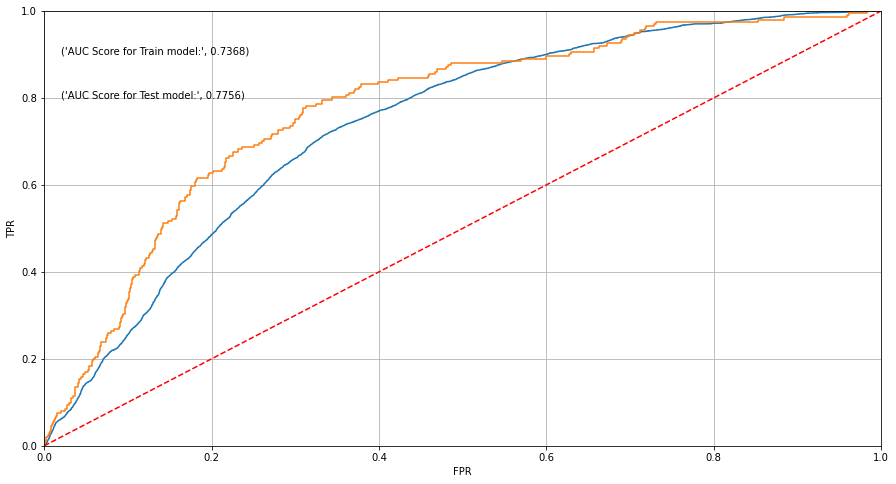

In [172]:
ypred_proba_train_lr = lr.predict_proba(xtrain_samp)[:, 1]
ypred_proba_test_lr = lr.predict_proba(xtest)[:, 1]

fpr, tpr, thresholds = roc_curve(ytrain_samp, ypred_proba_train_lr)
plt.plot(fpr, tpr)
plt.text(x = 0.02, y = 0.9, s = ('AUC Score for Train model:',round(roc_auc_score(ytrain_samp, ypred_proba_train_lr),4)))

fpr, tpr, thresholds = roc_curve(ytest, ypred_proba_test_lr)
plt.plot(fpr, tpr)
plt.text(x = 0.02, y = 0.8, s = ('AUC Score for Test model:',round(roc_auc_score(ytest, ypred_proba_test_lr),4)))

plt.plot([0,1], '--r')

plt.xlabel("FPR")
plt.ylabel("TPR")

plt.xlim(0,1)
plt.ylim(0,1)
plt.grid(True)

In [173]:
fpr, tpr, thresholds = roc_curve(ytrain_samp, ypred_proba_train_lr)

youden_tab = pd.DataFrame({"TPR":tpr, "FPR":fpr, "Threshold":thresholds})
youden_tab['Difference'] = youden_tab['TPR'] - youden_tab['FPR']

youden_tab.sort_values(by='Difference', ascending=False).head(1)

,TPR,FPR,Threshold,Difference
15794,0.720645,0.340543,0.428207,0.380102


In [175]:
lr = LogisticRegression(class_weight='balanced')
lr.fit(xtrain_samp, ytrain_samp)
print(lr.score(xtrain_samp, ytrain_samp), lr.score(xtest, ytest))

ypred_proba_train_lr = lr.predict_proba(xtrain_samp)[:, 1]
ypred_train_lr = [1 if x>=0.43 else 0 for x in ypred_proba_train_lr]
print(confusion_matrix(ytrain_samp, ypred_train_lr))
print(classification_report(ytrain_samp, ypred_train_lr))

ypred_proba_test_lr = lr.predict_proba(xtest)[:, 1]
ypred_train_lr = [1 if x>=0.43 else 0 for x in ypred_proba_test_lr]
print(confusion_matrix(ytest, ypred_test_lr))
print(classification_report(ytest, ypred_test_lr))

0.7041803701992335 0.78818487909397
[[34217 17239]
 [ 6315 15811]]
              precision    recall  f1-score   support

           0       0.84      0.66      0.74     51456
           1       0.48      0.71      0.57     22126

    accuracy                           0.68     73582
   macro avg       0.66      0.69      0.66     73582
weighted avg       0.73      0.68      0.69     73582

[[10173  2694]
 [   74   127]]
              precision    recall  f1-score   support

           0       0.99      0.79      0.88     12867
           1       0.05      0.63      0.08       201

    accuracy                           0.79     13068
   macro avg       0.52      0.71      0.48     13068
weighted avg       0.98      0.79      0.87     13068

